In [3]:
import pandas as pd
import numpy as np
import struct
import numpy as np
import base64

import matplotlib.pyplot as plt

from pyusbus.confCONV import cvx as payload


In [4]:
PL = {}
for k in payload.keys():
    PL[k] = np.array([x for x in base64.b64decode(payload[k][1:-1]) ])

In [52]:
cPL = {}
dPL = {}
for k in PL:
    if (PL[k][3] != 90) | (PL[k][-4] != 165):
        print(k,"Packet",PL[k][-3]) 
    else:
        cPL[k] = PL[k][4:-4] # clean packets
        if np.sum(cPL[k]) == 0:
            print("Packet",k,"is null.")
        elif np.sum(cPL[k][:8]) != 0:
            print("Packet",k,np.sum(cPL[k][:8]))
        else:
            dPL[k] = np.trim_zeros(cPL[k][8:], 'b')

Packet 172 is null.
Packet 204 79
Packet 222 is null.


In [53]:
dPL.keys()

dict_keys(['163', '174', '176', '178', '180', '182', '184', '186', '188', '190', '192', '202', '218', '228', '234', '238', '240', '244', '246', '250', '256', '262', '270', '276', '282', '288', '294', '298', '304', '310', '316', '322', '326', '332', '338', '344'])

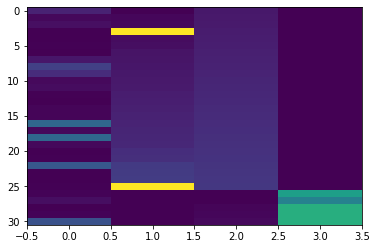

In [55]:
plt.imshow(dPL["163"].reshape(len(dPL["163"])//4,4),aspect="auto")

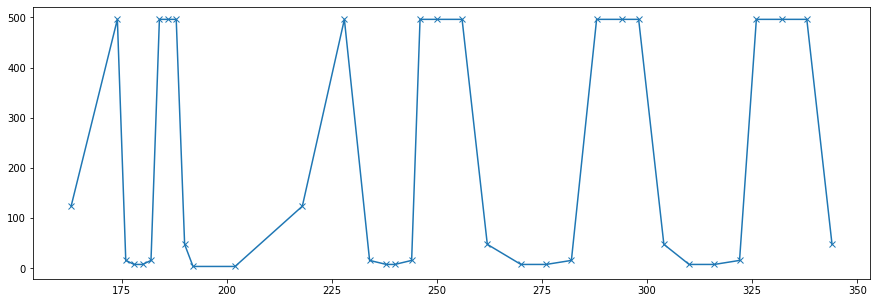

In [72]:
def add_labels(line):
    x,y=line.get_data()
    labels=map(','.join,zip(map(lambda s: '%g'%s,x),map(lambda s: '%g'%s,y)))
    map(plt.text,x,y,labels)
    
plt.figure(figsize=(15,5))
y = [len(dPL[k]) for k in dPL.keys()]
x = [int(x) for x in dPL.keys()]
line,= plt.plot(x,y, marker="x")
add_labels(line)

In [74]:
dPL["176"]

array([  0,  76, 124,  32,   0,  76, 125,  32,   0,  76, 126,  32,   0,
        76, 127,  32])

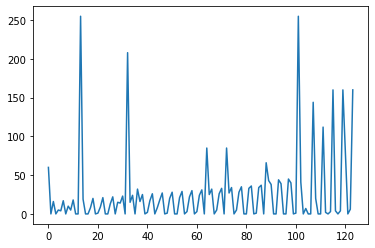

In [76]:
plt.plot(dPL["218"])

Text(0.5, 1.0, 'Packets 228')

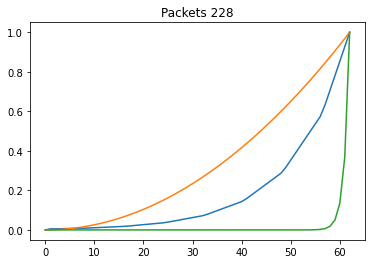

In [155]:
BA = bytes(cPL["228"].tolist())
X = struct.unpack( '<'+str(len(cPL["228"])//8)+'d', BA)
plt.plot(np.array(X)/np.max(X))
plt.plot([x*x/(62*62) for x in range (63)])
plt.plot([np.exp(x)/np.exp(62) for x in range (63)])
plt.title("Packets 228")

Text(0.5, 1.0, 'Packets 246 and 250')

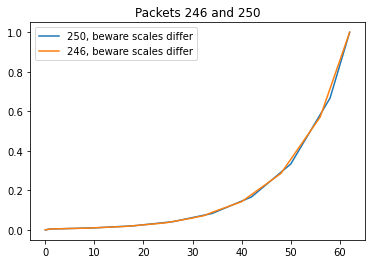

In [154]:
BA2 = bytes(cPL["246"].tolist())
BA = bytes(cPL["250"].tolist())

X2 = struct.unpack( '<'+str(len(cPL["246"])//8)+'d', BA2) 
X = struct.unpack( '<'+str(len(cPL["250"])//8)+'d', BA)
plt.plot(np.array(X)/np.min(X), label="250, beware scales differ") 
plt.plot(np.array(X2)/np.min(X2), label="246, beware scales differ") 
plt.legend()
plt.title("Packets 246 and 250")

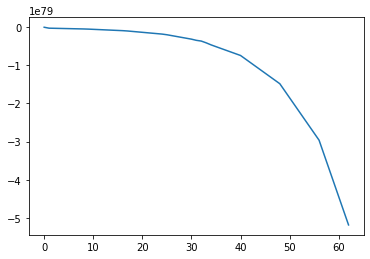